# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [13]:
%matplotlib inline
from __future__ import division
import DispaSET as ds
import pandas as pd
import numpy as np

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [3]:
path = 'Simulations/SimulationEU'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [4]:
inputs,results = ds.GetResults(path=path,cache=True)

Detected /home/sylvain/progs/GAMS/gams24.4_linux_x64_64_sfx/ as GAMS path on this computer
Loading gdx file Simulations/SimulationEU/Results.gdx took 22.0973529816s
Successfully loaded variable CurtailedPower
Successfully loaded variable OutputPower
Successfully loaded variable OutputSystemCost
Successfully loaded variable OutputCommitted
Successfully loaded variable LostLoad_RampUp
Successfully loaded variable ShedLoad
Successfully loaded variable LostLoad_Reserve2D
Successfully loaded variable *
Successfully loaded variable LostLoad_RampDown
Successfully loaded variable LostLoad_Reserve2U
Successfully loaded variable OutputFlow
Successfully loaded variable OutputStorageLevel
Successfully loaded variable OutputStorageInput
Successfully loaded variable LostLoad_MinPower
Successfully loaded variable LostLoad_MaxPower
Time to convert to dataframes: 189.595956087s


DispaSET/PostProcessing.py:465: UserWarning: Unit '[120, 122, 128, 142, ... ge - DE - HPHS - WAT' present in the results cannot be found in the set 'u' from the inputs
  warn("Unit '" + key + "' present in the results cannot be found in the set 'u' from the inputs")
DispaSET/PostProcessing.py:465: UserWarning: Unit '[127, 174, 180, 183, ... re - DE - WTOF - WIN' present in the results cannot be found in the set 'u' from the inputs
  warn("Unit '" + key + "' present in the results cannot be found in the set 'u' from the inputs")
DispaSET/PostProcessing.py:465: UserWarning: Unit '[154, 156, 157, 253] ... ge - DE - HROR - WAT' present in the results cannot be found in the set 'u' from the inputs
  warn("Unit '" + key + "' present in the results cannot be found in the set 'u' from the inputs")
DispaSET/PostProcessing.py:465: UserWarning: Unit '[256, 291, 316, 318, ... ge - FR - HPHS - WAT' present in the results cannot be found in the set 'u' from the inputs
  warn("Unit '" + key + "' pres

### Format the inputs as a dictionary of dataframes:

In [5]:
datain = ds.ds_to_df(inputs)

DispaSET/DispaTools.py:106: UserWarning: The provided index has a length of 8760 while the simulation was designed for 8736 time elements
  warn('The provided index has a length of ' + str(len(dates)) + ' while the simulation was designed for ' +  str(len(sets['z'])) +  ' time elements')


### Select the time period for plotting

In [11]:
rng = pd.DatetimeIndex(start='2015-01-02 00:00:00',end='2015-02-02 04:01:00',freq='h')

### Plotting the detailed analysis for one of the zones, randomly

In [14]:
Nzones = len(inputs['sets']['n'])
c = inputs['sets']['n'][np.random.randint(Nzones)]
print('Randomly selected zone for the detailed analysis: '+ c)

Randomly selected zone for the detailed analysis: BE


### Generate plots

for the selected zone:
- dispatch plot (generation per fuel type) 
- rug  plog (ON/OFF status of each power plant 

True

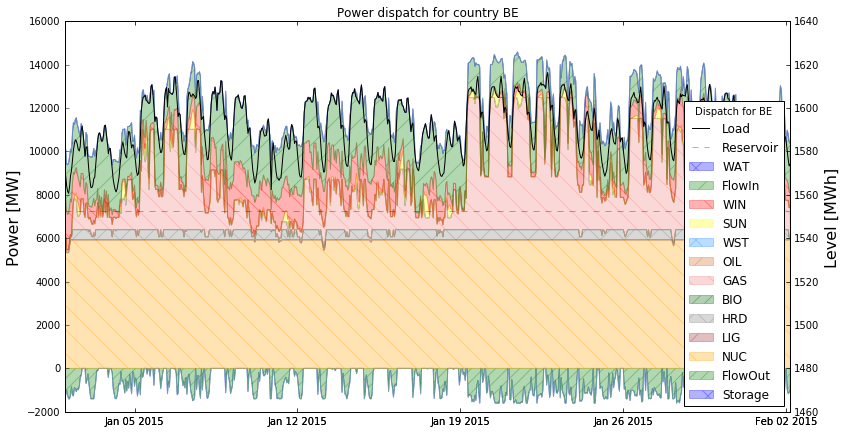

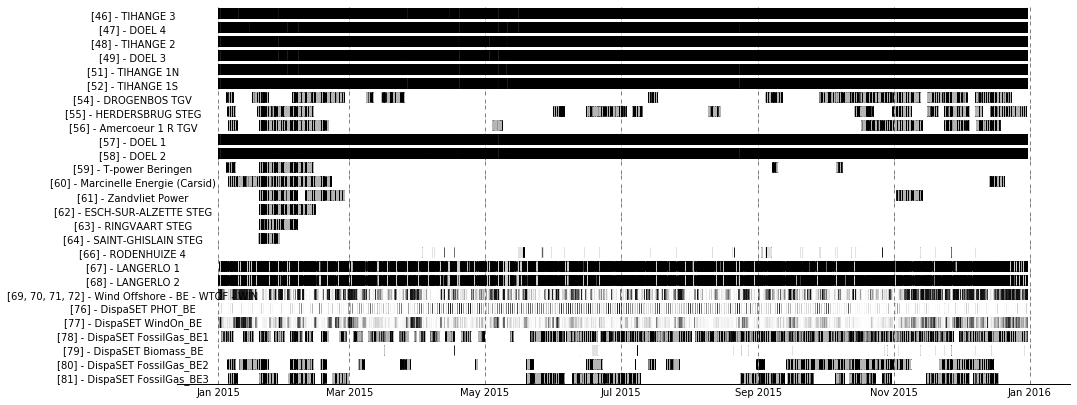

In [15]:
ds.CountryPlots(inputs,results,c,rng=rng)

### Analyse the results for each country and provide quantitative indicators:

In [16]:
r = ds.ResultAnalysis(inputs,results)


Average electricity cost : 167.597294631 EUR/MWh

There is a significant amount of lost load for LostLoad_Reserve2U: 2450699.11357 MWh. The results should be checked carefully

Aggregated statistics for the considered area:
Total consumption:1227.07310992 TWh
Peak load:203182.461067 MW
Net importations:-42.20072928 TWh

Country-Specific values (in TWh or in MW):
        Demand      PeakLoad  NetImports  LoadShedding  Curtailment
AT   59.375448  10144.000000    5.144132           NaN          NaN
BE   86.971154  13632.250000    8.911190           NaN          NaN
CH   44.694098   7794.262468    7.199527           NaN          NaN
DE  478.030824  76212.250000  -17.260122           NaN          NaN
FR  470.075612  90588.000000  -51.878128           NaN          NaN
NL   87.925973  16285.500000    5.682672           NaN          NaN

Number of hours of congestion on each line: 
{'AT -> CH': 5917,
 'AT -> DE': 430,
 'BE -> FR': 62,
 'BE -> NL': 344,
 'CH -> AT': 720,
 'CH -> DE': 15,
 'CH 

### Plot the levels of all storage units:

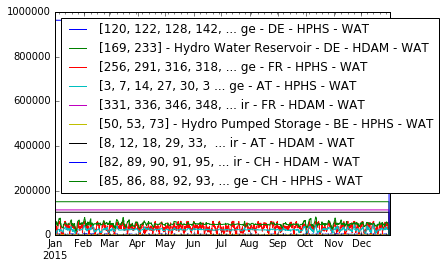

In [17]:
if 'OutputStorageLevel' in results:
    results['OutputStorageLevel'].plot()

### Bar plot of the overall generation in each zone by fuel type:

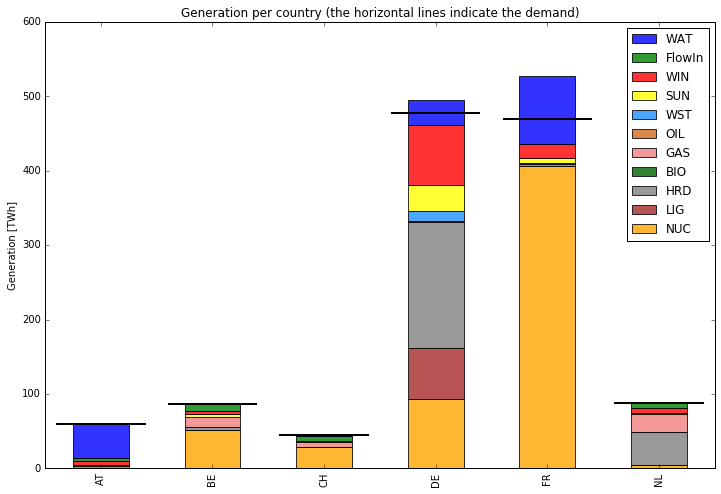

In [18]:
PPindicators = ds.PerPowerPlantIndicators(inputs,results)
ax = ds.EnergyBarPlot(datain,results,PPindicators)